# Student Stress Factors & Academic Performance: EDA + Prediction

**Dataset:** StressLevelDataset.csv (1,100 students, 21 variables)

Dataset Link: https://drive.google.com/file/d/1oBQdHuebufWyMuYksH9v0aeAkkb1CUBV/view


We will:
1. Load and inspect the data.
2. Clean / prepare the data (handle missing values, duplicates, feature engineering).
3. Perform exploratory data analysis (EDA) and visualizations.
4. Ask and answer at least 5 research questions about student stress.
5. Train a machine learning model to **predict high vs low stress**.

### Step 1 – Load libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
)

# Make plots look decent
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

#### Loading dataset from Google Drive

In [ ]:
# Install gdown if you haven't already
%pip install gdown

In [ ]:
import gdown
import pandas as pd

gdrive_file_id = '1oBQdHuebufWyMuYksH9v0aeAkkb1CUBV'
output_filename = 'Stress Level Dataset.csv' # Or any desired filename

# Downloading the file from Google Drive
gdown.download(id=gdrive_file_id, output=output_filename, quiet=False)

# Load the dataset into a pandas DataFrame
df_gdrive = pd.read_csv(output_filename)

# Display the first few rows to confirm it's loaded correctly
display(df_gdrive.head())

Downloading...
From: https://drive.google.com/uc?id=1oBQdHuebufWyMuYksH9v0aeAkkb1CUBV
To: /content/Stress Level Dataset.csv
100%|██████████| 49.8k/49.8k [00:00<00:00, 26.3MB/s]


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
### Basic info about the raw data
print("Shape (rows, columns):", df_gdrive.shape)
print("\nColumn names:")
print(df_gdrive.columns.tolist())

print("\nData types:")
print(df_gdrive.dtypes)


# Summary statistics (for both numeric & object columns)
df_gdrive.describe(include="all").T

Shape (rows, columns): (1100, 21)

Column names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Data types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


### Step 2 – Data preparation and cleaning

We'll:
* Define feature groups (psychological, physiological, environmental, academic, social)
* Check for and handle missing values
* Remove exact duplicates (if any)
* Create some helpful engineered features:
  - average scores per factor group
  - binary **high_stress** label for ML

In [ ]:
# Copy to a working dataframe
df = df_gdrive.copy()

# 2.1 – Define feature groups
psych_cols = ["anxiety_level", "self_esteem", "mental_health_history", "depression"]
phys_cols = ["headache", "blood_pressure", "sleep_quality", "breathing_problem"]
env_cols = ["noise_level", "living_conditions", "safety", "basic_needs"]
acad_cols = [
    "academic_performance",
    "study_load",
    "teacher_student_relationship",
    "future_career_concerns",
]
social_cols = [
    "social_support",
    "peer_pressure",
    "extracurricular_activities",
    "bullying",
]

target_col = "stress_level"

all_feature_cols = psych_cols + phys_cols + env_cols + acad_cols + social_cols

print("Total feature columns:", len(all_feature_cols))
print("Target column:", target_col)

# Sanity check: ensure the sets match the dataframe columns
print("\nColumns missing from our lists:",
      set(df.columns) - set(all_feature_cols) - {target_col})
print("Columns in lists but not in dataframe:",
      set(all_feature_cols + [target_col]) - set(df.columns))


Total feature columns: 20
Target column: stress_level

Columns missing from our lists: set()
Columns in lists but not in dataframe: set()


In [ ]:
# 2.2 – Check for missing values

print("Missing values per column:")
df.isna().sum()

Missing values per column:


,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
# 2.3 – Basic handling of missing data

# The ML pipeline will impute numeric values,
# but for EDA it's often convenient to ensure we don't have all-NaN columns.

# Check if any column is entirely missing
all_nan_cols = df.columns[df.isna().all()].tolist()
print("Columns with all NaN values:", all_nan_cols)

# For now we won't drop rows yet; instead we'll let the ML pipeline impute.
# If you want, you can drop rows with missing target values (if any):

before = df.shape[0]
df = df.dropna(subset=[target_col])
after = df.shape[0]
print(f"Rows dropped due to missing {target_col}: {before - after}")

Columns with all NaN values: []
Rows dropped due to missing stress_level: 0


In [ ]:
# 2.4 – Check for and drop duplicate rows

dup_count = df.duplicated().sum()
print("Number of duplicate rows:", dup_count)

df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Number of duplicate rows: 0
Shape after dropping duplicates: (1100, 21)


In [ ]:
# 2.5 – Ensure numeric types (they should already be numeric, but just in case)

for col in all_feature_cols + [target_col]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.dtypes

,0
anxiety_level,int64
self_esteem,int64
mental_health_history,int64
depression,int64
headache,int64
blood_pressure,int64
sleep_quality,int64
breathing_problem,int64
noise_level,int64
living_conditions,int64


In [ ]:
# 2.6 – Feature engineering

# Create average scores for each factor category.
# This will help summarize each student's overall psychological / physiological / etc. profile.

df["psychological_score"] = df[psych_cols].mean(axis=1)
df["physiological_score"] = df[phys_cols].mean(axis=1)
df["environmental_score"] = df[env_cols].mean(axis=1)
df["academic_score"] = df[acad_cols].mean(axis=1)
df["social_score"] = df[social_cols].mean(axis=1)

# Overall "stressors" score: average of all non-target features
df["overall_factor_score"] = df[all_feature_cols].mean(axis=1)

In [ ]:
# 2.7 – Create a binary high_stress label using quantiles
# We'll define "high stress" as the top 30% stress_level values.

quantiles = df[target_col].quantile([0.7])
high_stress_threshold = quantiles.loc[0.7]

print("High-stress threshold (70th percentile of stress_level):", high_stress_threshold)

df["high_stress"] = (df[target_col] >= high_stress_threshold).astype(int)

df[[target_col, "high_stress"]].head()

High-stress threshold (70th percentile of stress_level): 2.0


,stress_level,high_stress
0,1,0
1,2,1
2,1,0
3,2,1
4,1,0


### Step 3 – Exploratory Data Analysis (EDA) & Visualization

We'll:
* Look at distributions of key variables (e.g., stress_level, academic_performance)
* Summarize the factor scores
* Explore correlations between factors and stress_level
* Prepare material for our later research questions

In [ ]:
# 3.1 – Summary stats for key numeric fields

key_cols = [
    target_col,
    "psychological_score",
    "physiological_score",
    "environmental_score",
    "academic_score",
    "social_score",
    "overall_factor_score",
]
df[key_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
stress_level,1100.0,0.996364,0.821673,0.00,0.00,1.00,2.00,2.00
psychological_score,1100.0,10.472273,2.178647,1.75,9.00,10.50,11.75,17.25
physiological_score,1100.0,2.525909,0.511147,0.75,2.25,2.50,3.00,4.50
environmental_score,1100.0,2.669318,0.681403,0.00,2.25,2.50,3.25,4.50
academic_score,1100.0,2.672955,0.467344,0.25,2.50,2.75,3.00,4.50
social_score,1100.0,2.500227,0.823029,0.00,1.75,2.50,3.25,4.00
overall_factor_score,1100.0,4.168136,0.538965,1.75,3.85,4.15,4.50,5.65


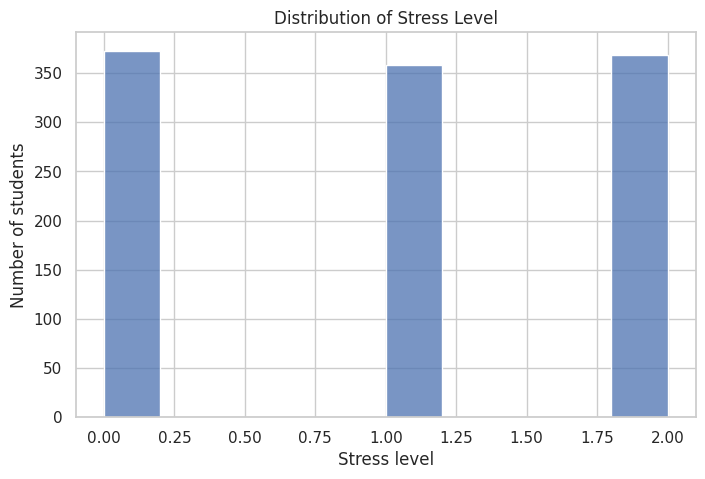

,count
stress_level,
0,373
1,358
2,369


In [ ]:
# 3.2 – Distribution of stress_level

plt.figure()
sns.histplot(df[target_col], bins=10)
plt.title("Distribution of Stress Level")
plt.xlabel("Stress level")
plt.ylabel("Number of students")
plt.show()

# Also look at value counts
df[target_col].value_counts().sort_index()

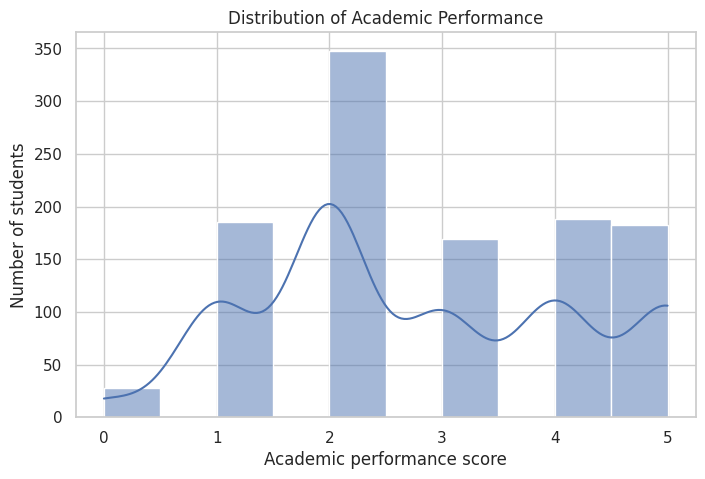

,academic_performance
count,1100.000000
mean,2.772727
std,1.414594
min,0.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
# 3.3 – Distribution of academic performance

plt.figure()
sns.histplot(df["academic_performance"], bins=10, kde=True)
plt.title("Distribution of Academic Performance")
plt.xlabel("Academic performance score")
plt.ylabel("Number of students")
plt.show()

df["academic_performance"].describe()

<Figure size 1000x600 with 0 Axes>

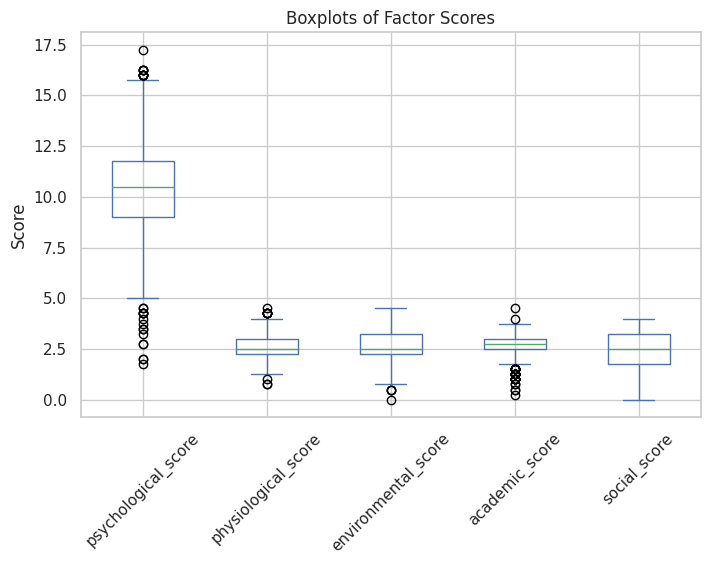

In [ ]:
# 3.4 – Factor score distributions

factor_scores = [
    "psychological_score",
    "physiological_score",
    "environmental_score",
    "academic_score",
    "social_score",
]

plt.figure(figsize=(10, 6))
df[factor_scores].plot(kind="box")
plt.title("Boxplots of Factor Scores")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

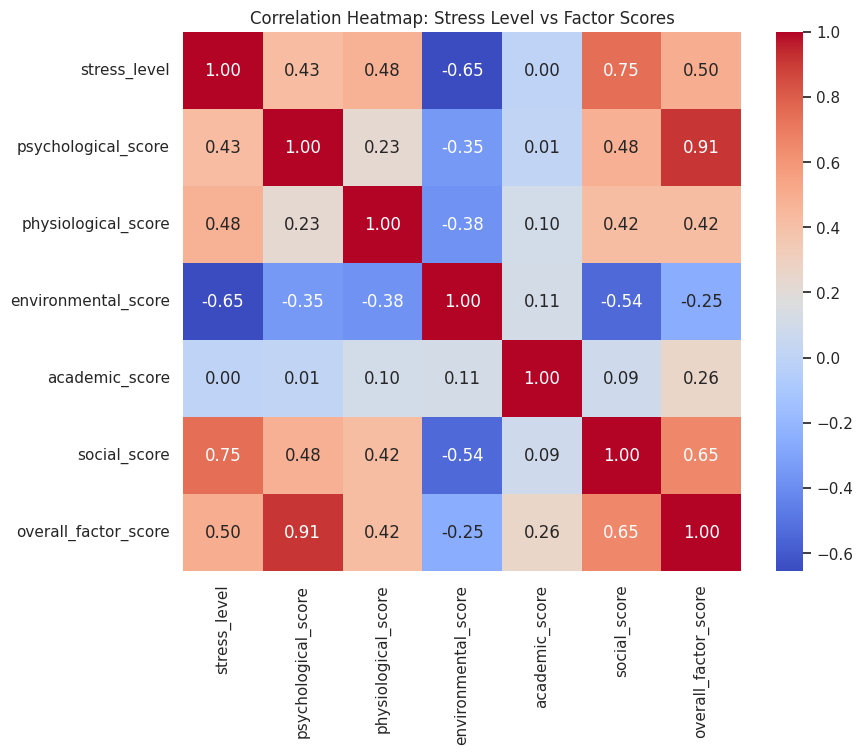

In [ ]:
# 3.5 – Correlation matrix (selected variables including stress_level)

corr_cols = (
    [target_col]
    + factor_scores
    + ["overall_factor_score"]
)

corr = df[corr_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Stress Level vs Factor Scores")
plt.show()

In [ ]:
# 3.6 – Correlation of each individual feature with stress_level

feature_corr = df[all_feature_cols + [target_col]].corr()[target_col].sort_values(ascending=False)
feature_corr

,stress_level
stress_level,1.000000
bullying,0.751162
future_career_concerns,0.742619
anxiety_level,0.736795
depression,0.734379
headache,0.713484
extracurricular_activities,0.692977
peer_pressure,0.690684
noise_level,0.663371
mental_health_history,0.648644


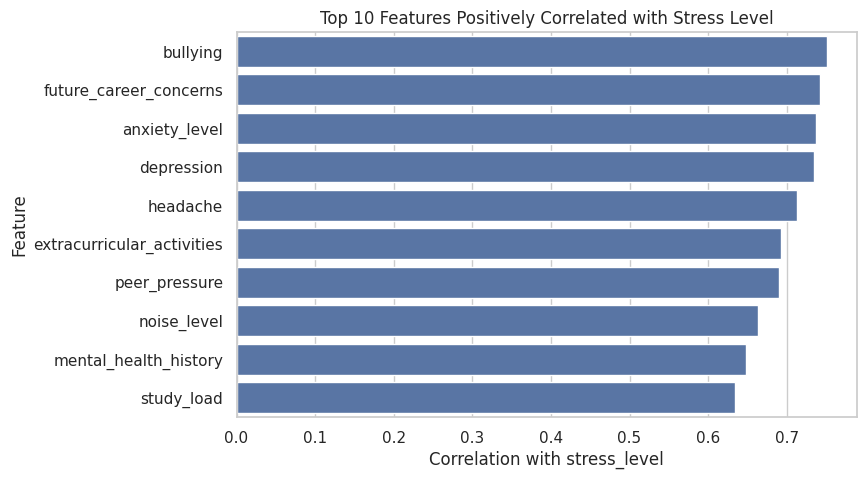

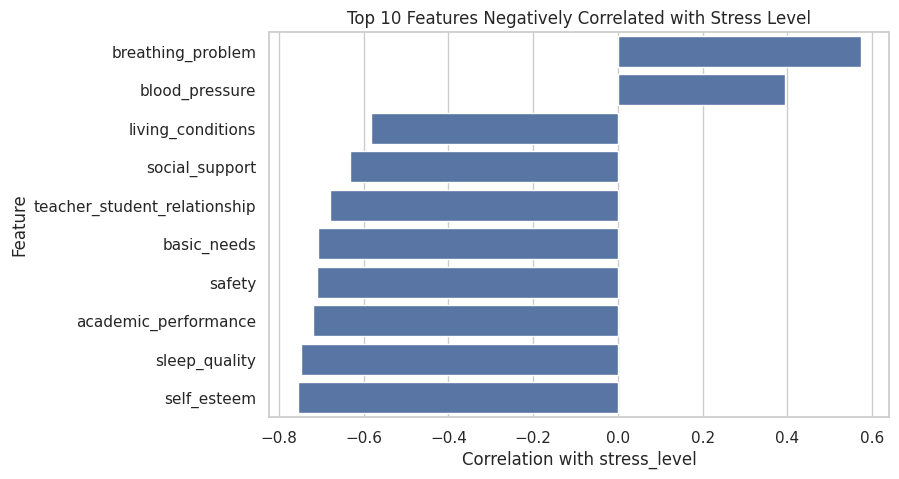

In [ ]:
# Plot top 10 strongest positive correlations and top 10 strongest negative (if any)

sorted_corr = feature_corr.drop(target_col)  # remove self-correlation
top_pos = sorted_corr.head(10)
top_neg = sorted_corr.tail(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_pos.values, y=top_pos.index)
plt.title("Top 10 Features Positively Correlated with Stress Level")
plt.xlabel("Correlation with stress_level")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=top_neg.values, y=top_neg.index)
plt.title("Top 10 Features Negatively Correlated with Stress Level")
plt.xlabel("Correlation with stress_level")
plt.ylabel("Feature")
plt.show()

### Step 4 – Research questions and answers
We'll answer these questions:

**1. How does academic performance vary across different stress levels?**

**2. Which factors (sleep quality, peer pressure, etc.) differ most between low- and high-stress students?**

**3. How strongly is sleep_quality associated with stress_level?**

**4. Are students with poor basic_needs or safety more likely to have high stress?**

**5. Does good teacher_student_relationship or social_support buffer stress?**

**6. How do combinations like high study_load + low sleep_quality show up in stress severity?**

For each question we compute statistics and/or plot visualizations.

#### Q1. How does academic performance vary across different stress levels?

We'll create 3 groups based on stress_level quantiles: low / medium / high, then compare academic_performance across these groups.

In [ ]:
# Create stress groups based on tertiles
q1, q2 = df[target_col].quantile([0.33, 0.66])
def assign_stress_group(x):
    if x <= q1:
        return "low"
    elif x <= q2:
        return "medium"
    else:
        return "high"

df["stress_group"] = df[target_col].apply(assign_stress_group)

df["stress_group"].value_counts()

# Academic performance by stress_group
acad_by_stress = df.groupby("stress_group")["academic_performance"].agg(["mean", "median", "count"])
acad_by_stress

,mean,median,count
stress_group,,,
high,1.661247,2.0,369
low,4.142091,4.0,373
medium,2.491620,2.0,358


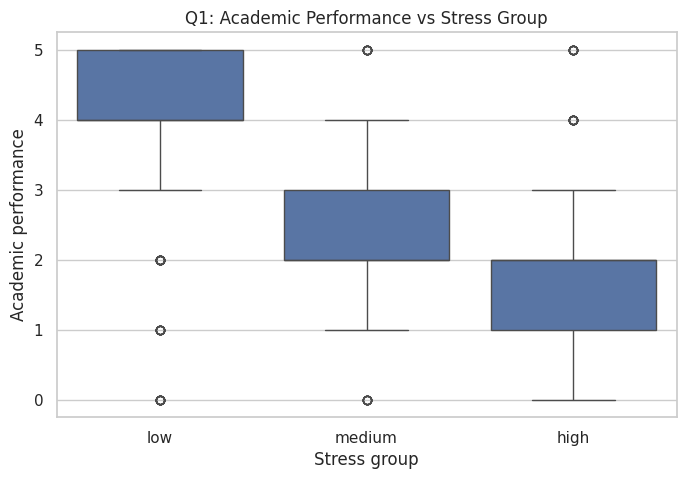

In [ ]:
plt.figure()
sns.boxplot(x="stress_group", y="academic_performance", data=df, order=["low", "medium", "high"])
plt.title("Q1: Academic Performance vs Stress Group")
plt.xlabel("Stress group")
plt.ylabel("Academic performance")
plt.show()


#### Q2. Which factors differ most between low- and high-stress students?

We'll compare the mean value of each feature for **low** vs **high** stress_group and see which differences are largest.

In [ ]:
low_group = df[df["stress_group"] == "low"]
high_group = df[df["stress_group"] == "high"]

mean_low = low_group[all_feature_cols].mean()
mean_high = high_group[all_feature_cols].mean()

diff = (mean_high - mean_low).sort_values(ascending=False)
diff.name = "high_minus_low"

diff_df = diff.to_frame()
diff_df.head(15)  # top 15 features where high-stress students score higher

,high_minus_low
depression,13.815863
anxiety_level,10.969449
bullying,2.799509
future_career_concerns,2.765150
headache,2.447845
peer_pressure,2.397568
extracurricular_activities,2.392583
noise_level,2.145244
study_load,2.031481
breathing_problem,1.956066


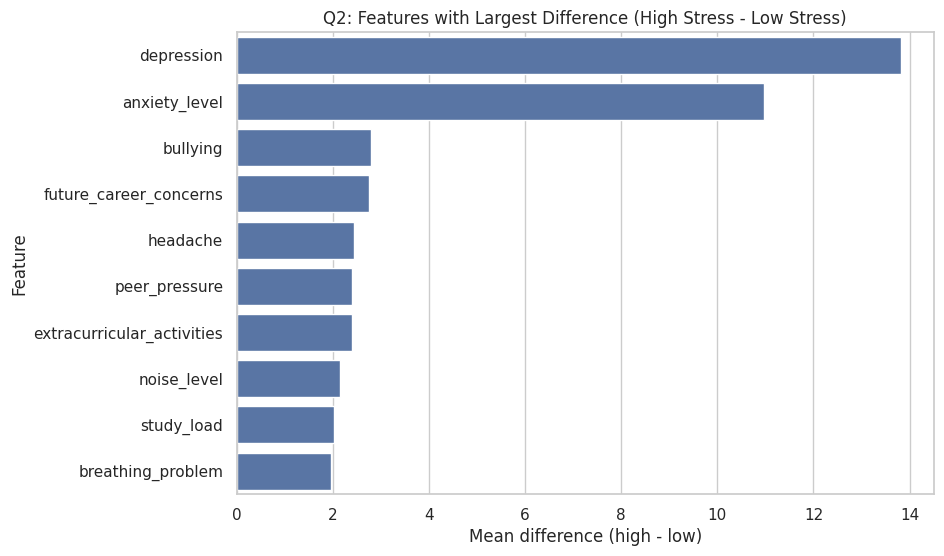

In [ ]:
plt.figure(figsize=(9, 6))
top_diff = diff_df.head(10)  # top 10 biggest differences
sns.barplot(x="high_minus_low", y=top_diff.index, data=top_diff)
plt.title("Q2: Features with Largest Difference (High Stress - Low Stress)")
plt.xlabel("Mean difference (high - low)")
plt.ylabel("Feature")
plt.show()

#### Q3. How strongly is sleep_quality associated with stress_level?

We'll:
* Plot stress_level vs sleep_quality
* Compute the correlation coefficient.

Correlation between sleep_quality and stress_level: -0.7490678608072432


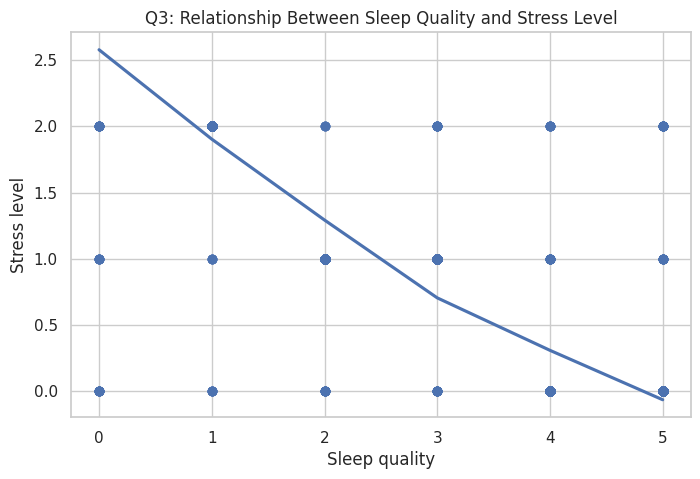

In [ ]:
corr_sleep_stress = df[["sleep_quality", target_col]].corr().iloc[0, 1]
print("Correlation between sleep_quality and stress_level:", corr_sleep_stress)

plt.figure()
sns.regplot(x="sleep_quality", y=target_col, data=df, lowess=True)
plt.title("Q3: Relationship Between Sleep Quality and Stress Level")
plt.xlabel("Sleep quality")
plt.ylabel("Stress level")
plt.show()


#### Q4. Are students with poor basic_needs or safety more likely to have high stress?

we will split students into "low" vs "high" groups based on the mean of basic_needs and safety, then compare their average stress_level and proportion of high_stress.

In [ ]:
# Thresholds
basic_needs_thr = df["basic_needs"].mean()
safety_thr = df["safety"].mean()

df["basic_needs_low"] = (df["basic_needs"] < basic_needs_thr).astype(int)
df["safety_low"] = (df["safety"] < safety_thr).astype(int)

group_cols = ["basic_needs_low", "safety_low"]

stress_by_needs_safety = (
    df.groupby(group_cols)
    .agg(
        avg_stress=(target_col, "mean"),
        high_stress_rate=("high_stress", "mean"),
        count=("high_stress", "size"),
    )
)

stress_by_needs_safety

avg_stress  high_stress_rate  count
basic_needs_low safety_low                                     
0               0             0.290865          0.050481    416
                1             0.919118          0.088235    136
1               0             0.957983          0.117647    119
                1             1.715618          0.750583    429

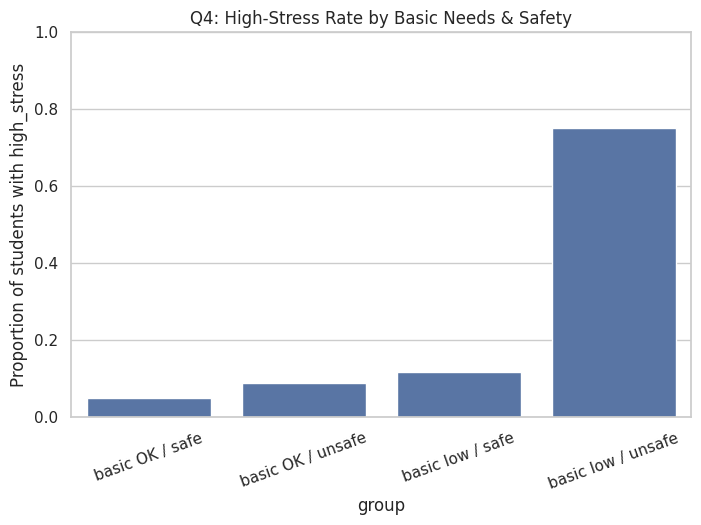

In [ ]:
# Visualize high_stress_rate by needs & safety groups

plot_df = stress_by_needs_safety.reset_index()
plot_df["group"] = plot_df["basic_needs_low"].map({0: "basic OK", 1: "basic low"}) + " / " + \
                   plot_df["safety_low"].map({0: "safe", 1: "unsafe"})

plt.figure()
sns.barplot(x="group", y="high_stress_rate", data=plot_df)
plt.title("Q4: High-Stress Rate by Basic Needs & Safety")
plt.ylabel("Proportion of students with high_stress")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()

#### Q5. Does good teacher_student_relationship or social_support buffer stress?

We'll:
* Define low vs high teacher_student_relationship and social_support
* Compare stress_level across these categories.

In [ ]:
teacher_thr = df["teacher_student_relationship"].mean()
support_thr = df["social_support"].mean()

df["teacher_rel_high"] = (df["teacher_student_relationship"] >= teacher_thr).astype(int)
df["support_high"] = (df["social_support"] >= support_thr).astype(int)

buffer_groups = df.groupby(["teacher_rel_high", "support_high"]).agg(
    avg_stress=(target_col, "mean"),
    high_stress_rate=("high_stress", "mean"),
    count=("stress_level", "size"),
)
buffer_groups

avg_stress  high_stress_rate  count
teacher_rel_high support_high                                     
0                0               1.655814          0.779070    430
                 1               1.000000          0.000000    155
1                0               1.200000          0.485714     70
                 1               0.325843          0.000000    445

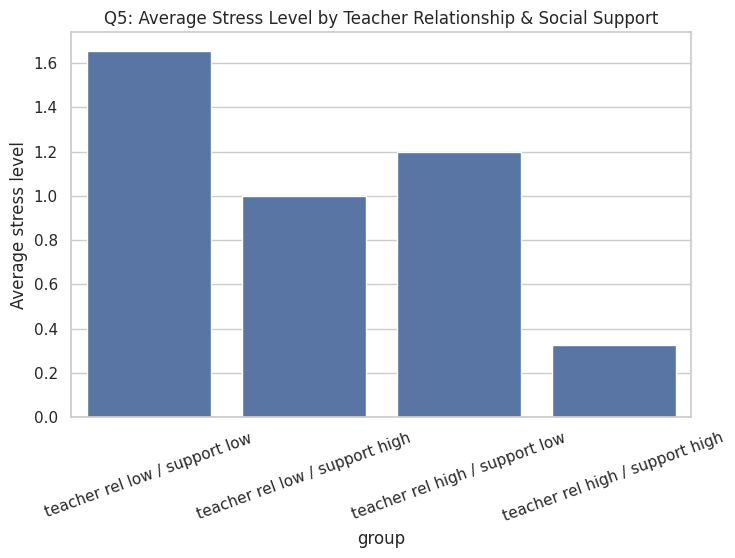

In [ ]:
plot_buf = buffer_groups.reset_index()
plot_buf["group"] = plot_buf["teacher_rel_high"].map({0: "teacher rel low", 1: "teacher rel high"}) + " / " + \
                    plot_buf["support_high"].map({0: "support low", 1: "support high"})

plt.figure()
sns.barplot(x="group", y="avg_stress", data=plot_buf)
plt.title("Q5: Average Stress Level by Teacher Relationship & Social Support")
plt.ylabel("Average stress level")
plt.xticks(rotation=20)
plt.show()


#### Q6. How do combinations like high study_load + low sleep_quality show up in stress severity?

We'll:
* Define high vs low study_load and sleep_quality based on medians
* Compare average stress levels across the 4 combinations.

In [ ]:
study_thr = df["study_load"].median()
sleep_thr = df["sleep_quality"].median()

df["study_high"] = (df["study_load"] >= study_thr).astype(int)
df["sleep_low"] = (df["sleep_quality"] < sleep_thr).astype(int)

combo = df.groupby(["study_high", "sleep_low"]).agg(
    avg_stress=(target_col, "mean"),
    high_stress_rate=("high_stress", "mean"),
    count=("stress_level", "size"),
)
combo

avg_stress  high_stress_rate  count
study_high sleep_low                                     
0          0            0.174359          0.066667    195
           1            1.111111          0.444444     27
1          0            0.605634          0.070423    355
           1            1.562141          0.609943    523

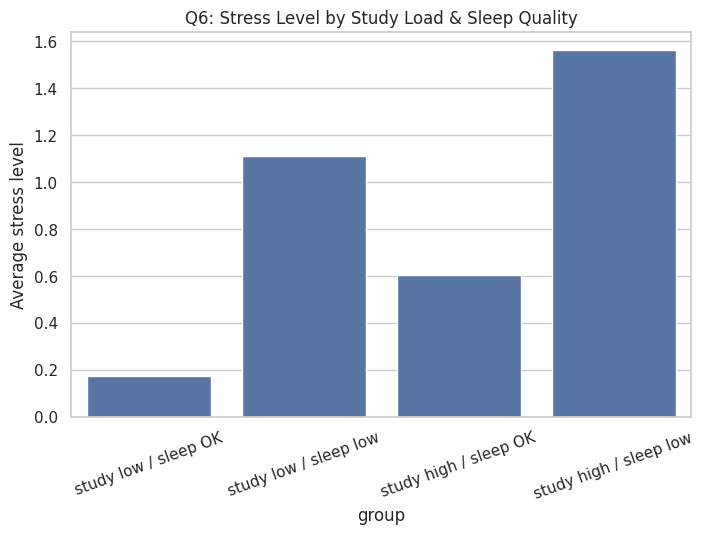

In [ ]:
combo_plot = combo.reset_index()
combo_plot["group"] = combo_plot["study_high"].map({0: "study low", 1: "study high"}) + " / " + \
                      combo_plot["sleep_low"].map({0: "sleep OK", 1: "sleep low"})

plt.figure()
sns.barplot(x="group", y="avg_stress", data=combo_plot)
plt.title("Q6: Stress Level by Study Load & Sleep Quality")
plt.ylabel("Average stress level")
plt.xticks(rotation=20)
plt.show()

## Step 5 – Machine Learning: Predicting High vs Low Stress

We'll build a **binary classifier**:

* **Target**: `high_stress` (1 if stress_level in top 33%, else 0)

* **Features**: all original factor variables + factor scores

* **Model**: Logistic Regression with:

  - median imputation for missing values
  - standardization (z-score scaling)


We'll:
* Split into train/test sets
* Fit the model
* Evaluate using accuracy, precision, recall, F1, ROC-AUC
* Look at model coefficients to see influential features

In [ ]:
# 5.1 – Define feature matrix X and target y

base_features = all_feature_cols + [
    "psychological_score",
    "physiological_score",
    "environmental_score",
    "academic_score",
    "social_score",
    "overall_factor_score",
]

X = df[base_features]
y = df["high_stress"]

print("X shape:", X.shape)
print("y distribution:")
print(y.value_counts(normalize=True))

X shape: (1100, 26)
y distribution:
high_stress
0    0.664545
1    0.335455
Name: proportion, dtype: float64


In [ ]:
# 5.2 – Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 825
Test size: 275


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       183
           1       0.93      0.90      0.92        92

    accuracy                           0.95       275
   macro avg       0.94      0.93      0.94       275
weighted avg       0.95      0.95      0.95       275



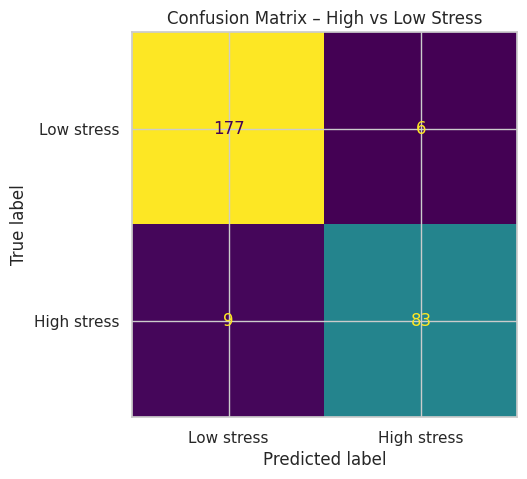

In [ ]:
# 5.3 – Build the pipeline: imputer + scaler + logistic regression

model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42)),
    ]
)

# 5.4 – Fit the model
model.fit(X_train, y_train)

# 5.5 – Predictions and evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low stress", "High stress"])
disp.plot(colorbar=False)
plt.title("Confusion Matrix – High vs Low Stress")
plt.show()

ROC-AUC: 0.9894274174388216


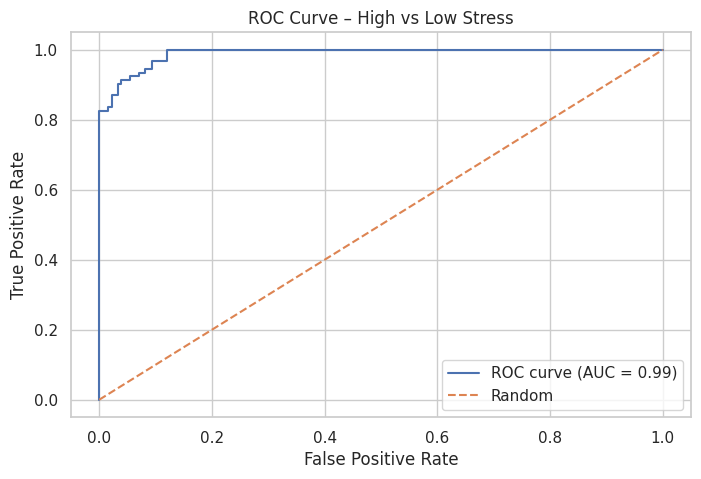

In [ ]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

print("ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – High vs Low Stress")
plt.legend()
plt.show()

In [ ]:
# 5.6 – Feature importance (logistic regression coefficients)

# We can inspect the coefficients of the logistic regression model to understand
# which features push a student towards high vs low stress.
# Positive coefficients mean higher values of that feature are associated with **higher probability of high_stress**,
# and negative coefficients mean they are associated with **lower** probability.

feature_names = X.columns

# Get coefficients from the logistic regression model (inside the pipeline)
log_reg = model.named_steps["clf"]
coef = log_reg.coef_.ravel()

coef_df = pd.DataFrame({"feature": feature_names, "coef": coef})
coef_df = coef_df.sort_values("coef", ascending=False)

coef_df.head(15)

,feature,coef
5,blood_pressure,2.367898
16,social_support,0.539285
21,physiological_score,0.529422
8,noise_level,0.378296
3,depression,0.369402
24,social_score,0.357734
14,teacher_student_relationship,0.301272
17,peer_pressure,0.198389
4,headache,0.195822
2,mental_health_history,0.178956


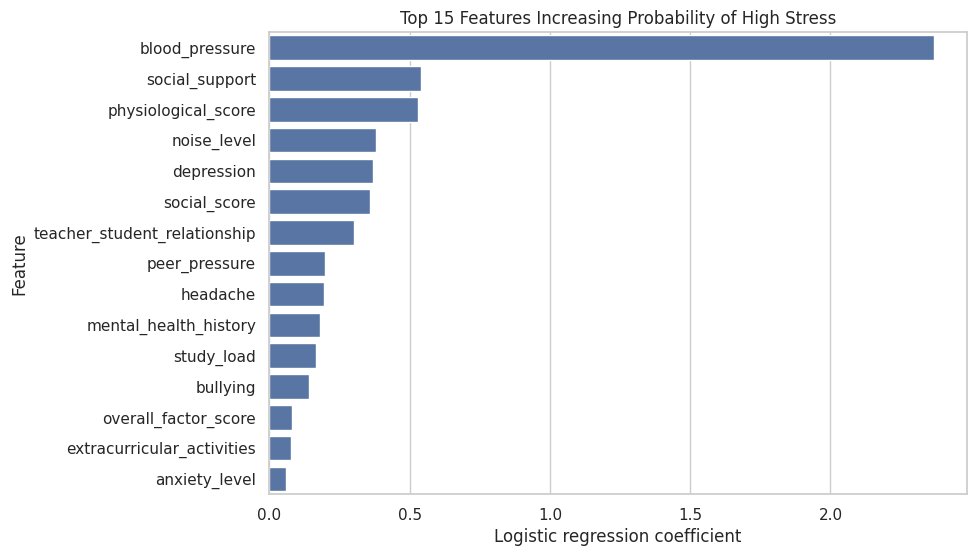

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x="coef", y="feature", data=coef_df.head(15))
plt.title("Top 15 Features Increasing Probability of High Stress")
plt.xlabel("Logistic regression coefficient")
plt.ylabel("Feature")
plt.show()

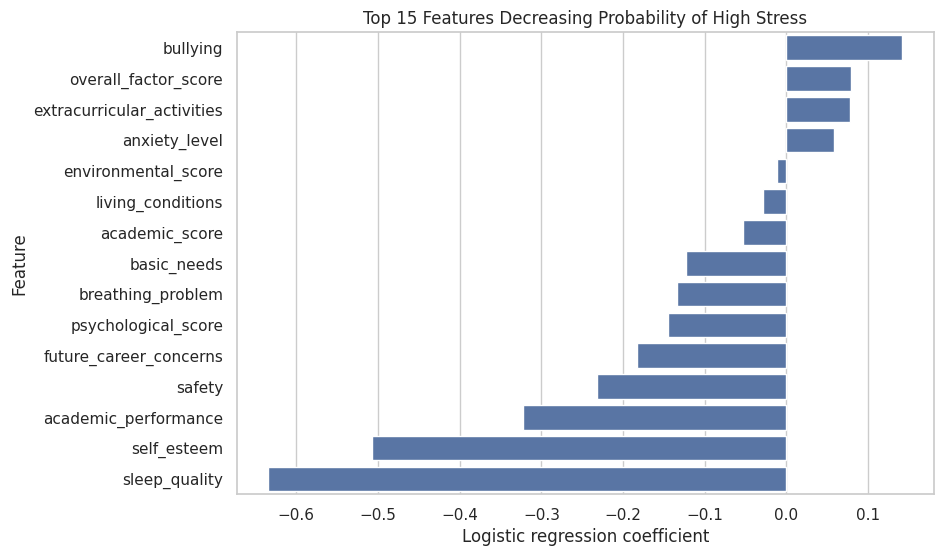

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x="coef", y="feature", data=coef_df.tail(15))
plt.title("Top 15 Features Decreasing Probability of High Stress")
plt.xlabel("Logistic regression coefficient")
plt.ylabel("Feature")
plt.show()